In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from IPython.display import Image as IMG
import cv2
from glob import glob

# Understanding the Amazon from Space

In [2]:
# Another example of remote sensing data: https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/data
# This multiclass labeling challenge requires contestants to maximize mean F2 score in identifying land cover in
# the Amazon rainforest basin to monitor deforestation.

In [3]:
IMG(url='https://kaggle2.blob.core.windows.net/competitions/kaggle/6322/media/chips.jpg')

In [4]:
DATA_DIR = '../data/'
# extract files like: 7z x -so train-jpg.tar.7z | tar xf - -C ./

In [5]:
# jpg and tif images...

In [6]:
os.listdir(DATA_DIR + 'train-jpg/')[:10]

['train_30597.jpg',
 'train_21957.jpg',
 'train_28345.jpg',
 'train_38348.jpg',
 'train_35258.jpg',
 'train_31405.jpg',
 'train_23572.jpg',
 'train_12556.jpg',
 'train_26691.jpg',
 'train_20155.jpg']

In [7]:
os.listdir(DATA_DIR + 'train-tif-v2/')[:10]

['train_23797.tif',
 'train_12223.tif',
 'train_11039.tif',
 'train_26625.tif',
 'train_34979.tif',
 'train_4772.tif',
 'train_253.tif',
 'train_16279.tif',
 'train_16778.tif',
 'train_28537.tif']

In [8]:
# The most easily discernible images might include cloudy/hazy images as well as agriculture/habitation
# These images offer globablly distinct coloration.
# With the ability to characterize fine detail, rivers, roads, and clouds should be more easily distinguised.

## Simple Idea: Color Histograms

In [9]:
# Color histograms can be used to group images with similar global color distribution
# https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html

In [10]:
def img_hist(img):
    chans = cv2.split(img)
    colors = ("b", "g", "r")
    features = []
    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan],[0],None,[16],[0, 256]).flatten()
        hist /= hist.sum()
        features.extend(hist)
    return features

In [11]:
img = cv2.imread(DATA_DIR + 'train-jpg/train_30597.jpg', 1)
print(img_hist(img))

[0.0, 0.00016784668, 0.27668762, 0.70982361, 0.0131073, 0.00021362305, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.1035156e-05, 0.089324951, 0.81755066, 0.092285156, 0.00077819824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00033569336, 0.15682983, 0.7628479, 0.077011108, 0.0029144287, 6.1035156e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [12]:
# With this vector representation for the image, we can choose a similarity metric and simple
# rules like K-Nearest Neighbors to label new image instances. Note the number of bins introduces
# a tunable parameter. We can even choose different levels of resolution to improve performance

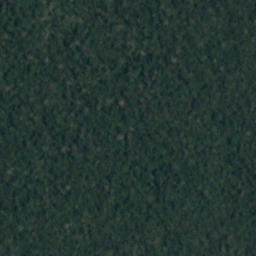

In [13]:
IMG(filename=DATA_DIR + 'train-jpg/train_30597.jpg')

In [14]:
hist_dict = dict()
for img_pth in glob(DATA_DIR + 'train-jpg/*'):
    img = cv2.imread(img_pth, 1)
    hist_dict[img_pth] = img_hist(img)

In [15]:
# With a dictionary or array, we can compute the dot product of image feature vectors
# Then we can label new instances with the label of the 'nearest' training instance

## Model Assumptions
* Assumes similar color distn conveys semantic similarity

## Further Directions
* Learn fine patterns with neural nets